# ICS 434: DATA SCIENCE FUNDAMENTALS

## Introduction to Probability
---

## Announcements

* Homework assignment 1
   * Due on **Tuesday, February 14, 11:59 PM**
   * Refer to the `Homework submission guidelines` announcement in Laulima for preparing and submitting your homework.
   

* Use Slack channel for questions and discussion on topics relevant to the course material.
  * Be sure to read the `Policy for using class slack workspace` announcement in Laulima.


## Slide Credits

Most of these slides were taken from Mahdi Belcaid.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(123)

###  What Place Do Probability and Statistics Occupy in Data Science?



```
"A Data scientist is someone who knows more statistics than a computer scientist and more computer science than a statistician."
                                           - Joshua Blumenstock
```

- https://didl.berkeley.edu/

### Sample Work in Science

<img src="https://www.dropbox.com/s/vyk19m5tyy7pf9j/Blumenstock.png?dl=1" alt="drawing" style="width:500px;"/>



### Probability Examples in Data Science: A/B Testing


* Comparing two versions of a web page to see which one is best for a specific task
  * Ex. Customer conversion, i.e., converting a customer who browses your site to a paying customer

<img src="images/what-ab-test.png?dl=1" alt="drawing" style="width:600px">

### A/B Testing at the Heart of Decision

* ```
"Five different “A/B” tests in the RNC report — in which Trump’s digital team changed one element of a page and then showed the different versions to website visitors simultaneously, to see which version performed better — showed that Trump’s website generated more online revenue per visitor when it used pictures of Trump giving two thumbs up next to fundraising asks, as opposed to other pictures."
```

* ```
"The report estimates that the testing program run by the RNC’s Performance Optimization and Experiments Team — POET for short — brought in over $30 million extra to the Trump campaign by boosting its digital engagement and fundraising."
```

Source: https://www.politico.com/story/2017/02/trump-thumbs-up-fundraising-strategy-234839

### Experiment

* An `experiment` is a procedure or `random process` that yields one outcome out of all possible outcomes of the experiment

* Some examples of experiments are:
  * Tossing a coin and observing the outcome
  * Rolling a die and observing the outcome
  * Counting the number of empty slots in a Biki stand
  * Measuring the weight of a patient in a hospital 

### Sample Space

* `Sample Space` **S** is the exhaustive set of all possible, disjoint outcomes of an experiment 

  * When rolling a die, it's the finite set {1, 2, 3, 4, 5, 6}
  * The number of HTTP requests received by an Amazon.com load balancer each hour
   * 0-X, where X is the maximum number of requests the server can handle without crashing 
     * Echo server can handle 350k * 3600 requests/hour
  * When weighing patients in a hospital, it's the continuous infinite set [0, Y] pounds.
    * Infinite number of values in between


### Sample Space

* `Sample Space` **S** is the exhaustive set of all possible, disjoint outcomes of an experiment 

  * When rolling a die, it's the finite set {1, 2, 3, 4, 5, 6}
  
  * The number of HTTP requests received by an Amazon.com load balancer each hour
    * 0-X, where X is the maximum number of requests the server can handle without crashing 
   
  * When weighing patients in a hospital, it's the continuous infinite set [0, Y] pounds.
    * Infinite number of values in between


### Event 

- In an experiment, an `event` **E** represents a __subset__ of the sample space 

  - The die lands 4  
  
  - The die lands on its odd side (1, 3, or 5)
  
  - The number of empty Biki slots is 0 
  
  - The weight of a patient is higher than 140 pounds but less than 200 pounds

### Probability


* Probabilities quantify beliefs

* Used to measure the uncertainty of an event 

* Ex:
  * How likely is a given person to default on a loan?
  * How unlikely is a given person to donate to a fundraising campaign?
  * How likely is a person to contract the flu this season?
  * How likely is that all the biki slots at the intersection of University Ave. and S. King St. will be full?


* Intuitively, we talk of a:

  * `null` (0) probability when we know an event cannot occur
  * probability of 1 if an event is certain

### Probability -- Cont'd

* Formally, a probability value is a number that quantifies the likelihood of an event and which satisfies the following two properties:
 
 $~~~~~~~~~~~~~~0 \leq p(E) \leq 1$$~~~~~~~~\text{and}~~~~~~~~ \sum\limits_{o \in \mathbf{S}}{p(o) = 1}$

  * Note that this is not a definition of probability (three axioms)

* A number that is between 0 and 1 is not necessarily a probability unless the sum of all outcomes in the sample space is 1

* In data analysis, you will most likely assign probabilities to events using probability distributions
  * A probability distribution is a function that gives the probabilities of occurrence of all the events in the sample space

### Probability -- Cont'd

* Formally, a probability value is a number that quantifies the likelihood of an event and which satisfies the following two properties:
 
 $$ 0 \leq p(E) \leq 1 \quad \text{and} \quad \sum\limits_{o \in \mathbf{S}}{p(o) = 1}$$

* A number that is between 0 and 1 is not necessarily a probability unless the sum of all outcomes in the sample space is 1

* In data analysis, you will most likely assign probabilities to events using probability distributions
  * A probability distribution is a function that gives the probabilities of occurrence of all the events in the sample space

### Random Sample
A subset $S$ or $ (S \in P) $ is a random sample if each element $x$ in $P$ has a non-zero probability of being selected.

### Random Sample - Cont'd
* Randomness: Each member of the population is chosen randomly, meaning every individual has the same probability of being selected. This is often achieved using random number generators or other methods that ensured unbiased results.
* Independece: The selection of one individual or item in the sample does not influence the selection of another. In other words, each selection is an independent event.

### Long Run Frequencies of  an Event


- The concept of long-run is an essential aspect of probability 

  - In a casino game where your chances of winning are 1 in 10, you are not guaranteed to win if you participate ten times

- When flipping a coin - assuming the coin is unbiased - we would intuitively expect to observe `in the long run` as many heads as tails, or about 50% heads and 50% tails

  - The probabilities of heads and tails are $p(H)=0.5$ and $p(T)=0.5$ respectively 
  
- We can prove this computationally by generating heads (ones) and tails (zeros) using the `Python` `random` module

### Recall: The Random Module

* Implements a large number of helpful functions that use randomness

 *  Shuffling, sampling, selecting element(s) from a list, etc.

```python
>>> print(random.choice([0, 1]))
0
>>> print(random.choice([0, 1]))
1
>>>  print(random.choice([0, 1]))
0
```

In [10]:
import random

random_trials = [random.choice([0, 1]) for _ in range(1000)]

### Inspecting the Number of Accumulated Heads 

* The progression of the number of heads after each iteration can be obtained using the cumulative sum (or `cumsum`)

* The cumulative sum for an element at position $a$, where $a \geq 1$ of an array $X$ is:$~~\sum_{i=0}^a X[i]$

* The `cumsum()` function is available through the package `numpy` 

  * More on `numpy` later

### Inspecting the Number of Accumulated Heads 

* The progression of the number of heads after each iteration can be obtained using the cumulative sum (or `cumsum`)

* The cumulative sum for an element at position $a$, where $a \geq 1$ of an array $X$ is:$~~\sum_{i=0}^a X[i]$

* The `cumsum()` function is available through the package `numpy` 

In [12]:
import numpy as np

cum_sum_random_trials = np.cumsum(random_trials)
    
print("-" * 30)
print(random_trials[0:10])

print("-" * 30)
print(list(cum_sum_random_trials[0:10]))

------------------------------
[0, 1, 0, 0, 0, 1, 1, 0, 0, 0]
------------------------------
[0, 1, 1, 1, 1, 2, 3, 3, 3, 3]


In [13]:
# Let's normalize `cum_sum_random_trials` by the number of trials in each position

cumulative_prop_heads = cum_sum_random_trials / range(1, len(cum_sum_random_trials)+1)

print("=====================")
print(random_trials[0:6])
print("---------------------")
print(list(cum_sum_random_trials[0:6]))
print("---------------------")
print(list(cumulative_prop_heads[0:6]))
print("=====================")

[0, 1, 0, 0, 0, 1]
---------------------
[0, 1, 1, 1, 1, 2]
---------------------
[0.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.3333333333333333]


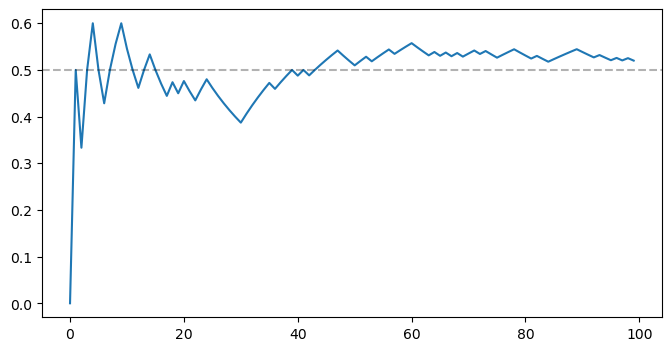

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(range(100), cumulative_prop_heads[0:100])
plt.axhline(0.5, color='k', linestyle='--', alpha=0.3);

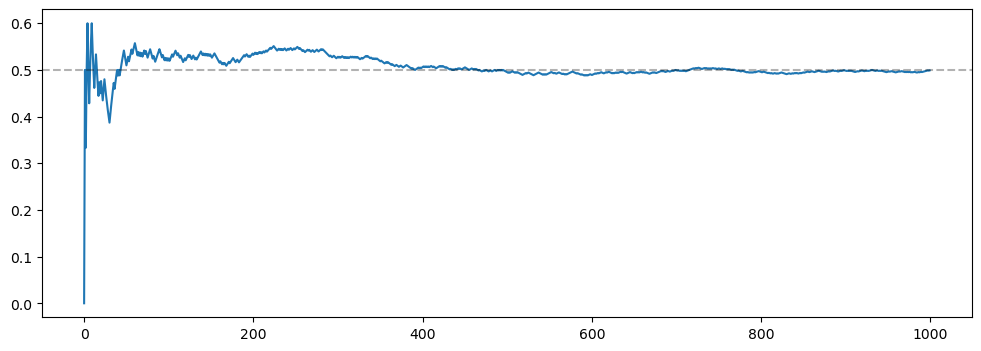

In [6]:
plt.figure(figsize=(12, 4))
plt.plot(range(len(cumulative_prop_heads)), cumulative_prop_heads)
plt.axhline(0.5, color='k', linestyle='--', alpha=0.3);

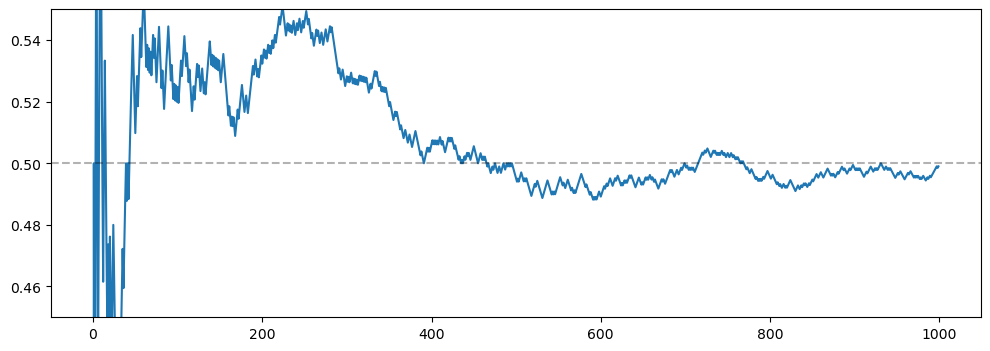

In [7]:
plt.figure(figsize=(12, 4))
plt.plot(range(len(cumulative_prop_heads)), cumulative_prop_heads)
plt.axhline(0.5, color='k', linestyle='--', alpha=0.3);
plt.ylim(0.45, 0.55);

### Long-Run Frequency

* Even after 1,000 draws, the proportion of heads is not exactly 0.5
  * A run of 1,000 samples is still just a random sample, and there is no guarantee that the relative frequency in the random sample will match the underlying probability of the event. 

* However, in the "much longer run," the frequency will tend to approximate $p(H)$ and $p(T)$


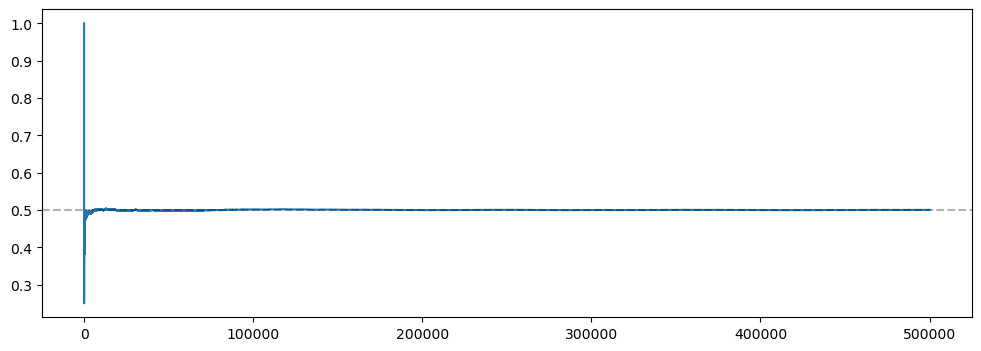

In [8]:
random_trials = [random.choice([0, 1]) for _ in range(500_000)]

cum_sum_random_trials = np.cumsum(random_trials)
cumulative_prop_heads = cum_sum_random_trials / range(1, len(cum_sum_random_trials)+1)

plt.figure(figsize=(12, 4))
plt.plot(range(len(cumulative_prop_heads)), cumulative_prop_heads)
plt.axhline(0.5, color='k', linestyle='--', alpha=0.3);

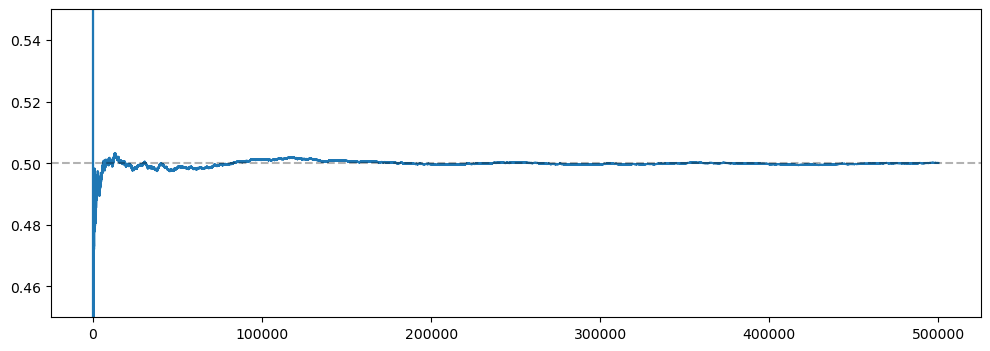

In [9]:
plt.figure(figsize=(12, 4))
plt.plot(range(len(cumulative_prop_heads)), cumulative_prop_heads)
plt.axhline(0.5, color='k', linestyle='--', alpha=0.3);
plt.ylim(0.45, 0.55);

### Probability versus Statistics

* Probability is a theoretical branch of mathematics, while statistics is applied  mathematics trying to make sense of real-world observations

* The following is useful although perhaps simplistic distinction between probability and statistics

  * Probability deals with predicting the likelihood of future events, while statistics analyzes the frequency of past events
  
    <img src="images/proba_stats_1.png?dl=1" alt="drawing" style="width:400px">

### The Underlying Generative Process

- Populations are dynamic. How are new members generated?

- The generative process summarizes the population as it describes how new members can be "realized"

    <img src="images/proba_stats_2.png?dl=1" alt="drawing" style="width:500px">

### Using Simulation to Infer a Statistic for Generative Process

* It's often challenging to mathematically derive event(s) probability(ies).
  * May involve conditional and hierarchical dependencies.
    * Flip a coin, select a die accordingly, then select a distribution, etc... 
* Often, it is much simpler to simulate the problem a large number of times to derive the desired probabilities.
 * Challenge with simulation: we need to know that we converged toward the correct solution.
   * We cannot flip a coin 10 times and accept the resulting probability.
   * How do we know we converged onto the correct solution?
 
*  Example: Solving the Monty Hall Problem 
 * A problem based on television game show `Let's Make a Deal`
 * Named after the show's original host, Monty Hall

### Using Simulation to Infer a Statistic for Generative Process

* It's often challenging to mathematically derive event(s) probability(ies).
  * May involve conditional and hierarchical dependencies.
    * Flip a coin, select a die accordingly, then select a distribution, etc... 
* Often, it is much simpler to simulate the problem a large number of times to derive the desired probabilities.
 * Challenge with simulation: we need to know that we converged toward the correct solution.
   * We cannot flip a coin 10 times and accept the resulting probability.
 
*  Example: Solving the Monty Hall Problem 
 * A problem based on television game show `Let's Make a Deal`
 * Named after the show's original host, Monty Hall

### The Monty Hall Problem
 
```
Suppose you're on a game show, and you're given the choice of three doors. Behind one door is a car and behind the others, goats. You pick a door (you don't open it yet), say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to change to selection?" 

Is it to your advantage to switch your initial choice?
```

<center><img src="images/monty_hall_2.png?dl=1" alt="drawing" style="width:500px"></center>

<center><img src="images/monty_hall.jpeg?dl=1" alt="drawing" style="width:600px"/></center>

### Simulate the Problem

* Question: Is it to your advantage to switch your choice?
 
  * We can easily simulate the problem and answer the question using the following approach

  1. Pick a door at random

  2. Reveal a door that has a goat

  3. Choose a strategy

    3.1 Stick with the initial choice
  
    or
    
    3.2 Switch our choice and pick the other door


* Repeat the process few thousand times and evaluate whether 3.1 is a better strategy than 3.2


In [10]:
doors = np.array(["GOAT", "CAR", "GOAT"])
random.shuffle(doors)
print(doors)

['GOAT' 'CAR' 'GOAT']


In [11]:
my_pick = random.choice([0, 1, 2])
my_pick

0

In [12]:
set([0, 1, 2]).difference([my_pick])

{1, 2}

In [13]:
remaining_doors = list(set([0, 1, 2]).difference([my_pick]))
remaining_doors

[1, 2]

In [14]:
print(doors[remaining_doors])

['CAR' 'GOAT']


In [15]:
# which of the remain doors should we reveal

np.where(doors[remaining_doors] == "GOAT")[0][0]

1

In [16]:
# which of the remain doors should we reveal
from itertools import compress

random.choice(list(compress(remaining_doors, doors[remaining_doors] == "GOAT")))

2

In [17]:
doors[my_pick] == "CAR"

False

In [18]:
def monty_hall(n=10000, switch=False):
    nb_wins = 0 
    doors = np.array(["GOAT", "CAR", "GOAT"])
    for _ in range(n):
        random.shuffle(doors)
        my_pick = random.choice([0, 1, 2])
        remaining_doors = list(set([0, 1, 2]).difference([my_pick]))
        reveal_door = np.where(doors[remaining_doors] == "GOAT")[0][0]
        if switch:
            my_pick = list(set([0, 1, 2]).difference([my_pick, reveal_door]))[0]
        if doors[my_pick] == "CAR":
            nb_wins += 1
    return nb_wins

In [19]:
from itertools import compress

def monty_hall(n=10000, switch=False):
    nb_wins = 0 
    doors = np.array(["GOAT", "CAR", "GOAT"])
    for _ in range(n):
        random.shuffle(doors)
        my_pick = random.choice([0, 1, 2])
        remaining_doors = list(set([0, 1, 2]).difference([my_pick]))
        goat_doors = list(compress(remaining_doors, doors[remaining_doors] == "GOAT"))
        reveal_door = random.choice(goat_doors)

        if switch:
            my_pick = list(set([0, 1, 2]).difference([my_pick, reveal_door]))[0]
        if doors[my_pick] == "CAR":
            nb_wins += 1
    return nb_wins

In [20]:
monty_hall(n=100_000, switch=True)

66559

In [21]:
monty_hall(n=100_000, switch=False)

33326

### Which Strategy is Better?


* The above does not directly tell us which strategy is better

  * It simply shows that out of 1,000 experiments, we won in $nw_1$ by switching and in $nw_2$ by keeping the original selection
  * It shows that in the simulation, $nw_1 > nw_2$
  
* Is this always the case?
  * How often will we expect the "Switch" strategy to be better?
  
* What is the probability of $nw_1 > nw_2$?
  * I.e. in the long run, how often should we expect $nw_1 > nw_2$?
  

In [22]:
def compare_strategy(n=1_000):
    nb_better_occurr = 0
    for i in range(n):
        if monty_hall(1, switch=True) >= monty_hall(1, switch=False):
            nb_better_occurr += 1 
    return(nb_better_occurr / n)

In [23]:
compare_strategy()

0.878

In [24]:
compare_strategy()

0.892

In [25]:
nb_trials = 500
trials_results = []
for _ in range(nb_trials):
    trials_results.append(compare_strategy())
 
trials_results[0:10]

[0.886, 0.893, 0.886, 0.891, 0.868, 0.896, 0.91, 0.9, 0.864, 0.892]

In [26]:
nb_trials = 500
trials_results = []
for _ in range(nb_trials):
    trials_results.append(monty_hall(n=1000, switch=True))
 
trials_results[0:10]

[672, 675, 675, 684, 658, 659, 651, 677, 652, 675]

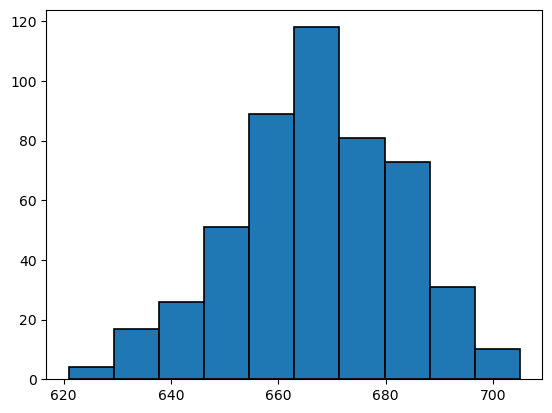

In [27]:
_ = plt.hist(trials_results, edgecolor='black', linewidth=1.2)

### Working with Non-Uniform Probabilities

* Easy to simulate problems with uniform probabilities

  * We know how to generate events for an experiment whose sample space is uniformly distributed 

    * Use `random.choice` and pass it a list representing the sample space
    
* What about non-uniform probabilities?

### Working with Non-Uniform Probabilities -- An Example

* You are the CEO of your startup and you are preparing for a funding round for your new software

* You want to show that users like some newly added functionality
  * Testing results on 30 users is the minimum number you are willing to report your VCs (investors)
    
* The probability of a person responding to your request to volunteer to test your software is 0.03
  * On average, out of ~100 people who receive your brochure by email, three will volunteer to test your software 

* You don't have a marketing database of potential users, and a company is charging you per email sent  
* Package that includes 1,200 emails sent is within your budget, but what is the probability it will lead to at least 30 responses?

  * What is the probability of having at least 30 people volunteering to test your software if you send the 1,200 emails to people?

### Working with Non-Uniform Probabilities -- Example Cont'd

* Strategy: 
  1. We encode those who volunteer as 1 and those who don't as 0
  2. We generate a vector that represents your population
    * Your population reflects the proportions of participants and non-participants observed in the population

  2. Use `np.random.choice` to sample 1,200 people and estimate how many will participate in the experiment

In [29]:
# We encode those who volunteer as 1 and those who don't as 0.
# We generate a vector that represents the ratio of users likely to volunteer

population = [0] * 5  + [1] * 5
population

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [30]:
random.choice(population)

0

In [31]:
individuals = {1: "Volunteer", 0: "Non-volunteer"}
for i in range(4):
    val = random.choice(population)
    print(f"select {val}, which represents a {individuals[val]}")

select 0, which represents a Non-volunteer
select 1, which represents a Volunteer
select 1, which represents a Volunteer
select 0, which represents a Non-volunteer


In [32]:
# In 100 people, we have

population = [0] * 97  + [1] * 3

In [33]:
# We make some assumption about the populations here
# the code below can be easily written using random.choice method in the numpy package

def get_random_sample (population, nb_samples):
    nb_volunteers = 0 
    for _ in range(nb_samples):
        nb_volunteers += random.choice(population)
    return nb_volunteers

In [34]:
get_random_sample (population, 1200)

35

In [35]:
# Recall that the probability is the long-run proportion with which a certain event will occur 
# You can repeat the experiment and count the number of times you have at least 30 volunteers, 
# i.e., satisfied with the outcome

nb_satisfied = 0
nb_trials = 10000
nb_volunteers_per_exp = []
for i in range(nb_trials):
    nb_volunteers = get_random_sample(population, 1200)
    nb_volunteers_per_exp.append(nb_volunteers)

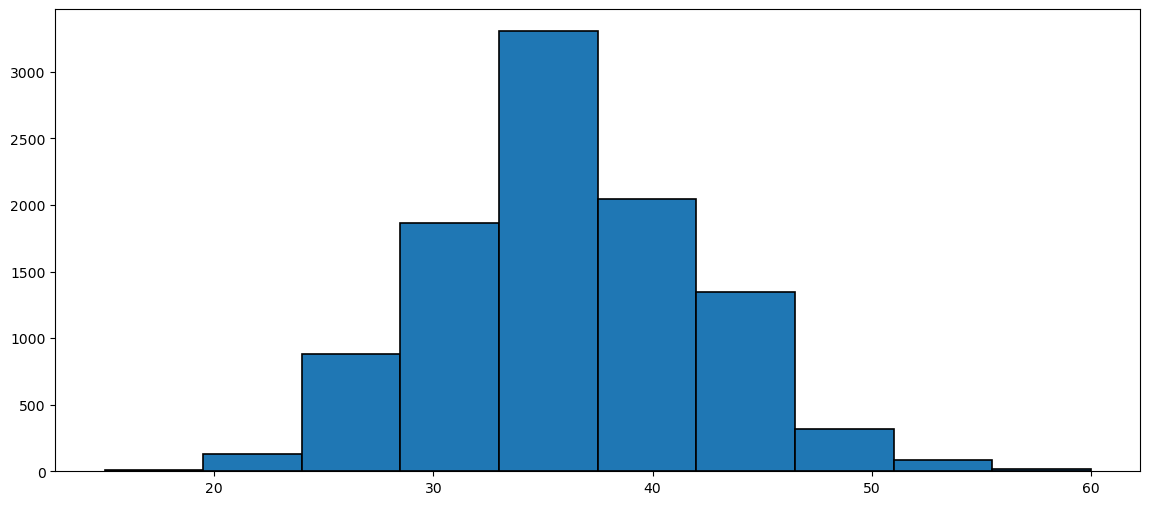

In [36]:
plt.figure(figsize=(14, 6))
_ = plt.hist(nb_volunteers_per_exp, edgecolor='black', linewidth=1.2)

In [37]:
nb_satisfied = sum(np.array(nb_volunteers_per_exp) > 30)
print(nb_satisfied/nb_trials)

0.818


### Probability Models and Probability Distributions 

* There are much easier ways to compute this and other popular (canonical) problems

* Numpy has parameterized functions, which, given a parameter, can easily compute the probability  of any outcome in the sample space

  *  Those are called probability distributions